In [9]:
# import relevant libraries, numpy, pandas, tensorflow, datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, LeakyReLU, Concatenate, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.constraints import NonNeg
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
# create a model and instantiating layers
input_layer = Input(shape=(1,))

# NN model using convex functions

# input layer
x = input_layer

# Define the architecture
for i in range(7):  # 6 layers
    z_i = Dense(units=(2**(6-i)), kernel_constraint=NonNeg(), bias_constraint=None)(x) #Hidden layer without activation + nonneg constraint
    y_i = Dense(units=(2**(6-i)),use_bias=False)(input_layer) #Layer for input feed
    x = z_i+y_i  # Hidden Layer + Input Feed Layer
    x = LeakyReLU(alpha=0.01)(x) # Activate

output_layer = x

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# model.summary()

In [11]:
# generate random data, arrays with numbers

# pairs ranging from [-2, 2]
np.random.seed(36)

X_train = np.random.uniform(-2, 2, 400)

# results for (x^2 - 1)^2 to train model
Y_train = np.array([(x**2 - 1)**2 for x in X_train.flatten()])


In [12]:
# compile model

model.compile(loss='mean_squared_error')

# train model

model.fit(X_train, Y_train, epochs=200, batch_size=10, shuffle=True, validation_split=0.2)

Epoch 1/200
32/32 [==============================] - 3s 24ms/step - loss: 4.4304 - val_loss: 4.9202
Epoch 2/200
32/32 [==============================] - 0s 11ms/step - loss: 4.3818 - val_loss: 4.8989
Epoch 3/200
32/32 [==============================] - 0s 11ms/step - loss: 4.3780 - val_loss: 4.8760
Epoch 4/200
32/32 [==============================] - 0s 8ms/step - loss: 4.3704 - val_loss: 4.8465
Epoch 5/200
32/32 [==============================] - 0s 16ms/step - loss: 4.3561 - val_loss: 4.7738
Epoch 6/200
32/32 [==============================] - 1s 16ms/step - loss: 3.5937 - val_loss: 3.3034
Epoch 7/200
32/32 [==============================] - 0s 13ms/step - loss: 2.6178 - val_loss: 3.2885
Epoch 8/200
32/32 [==============================] - 1s 16ms/step - loss: 2.6084 - val_loss: 3.2785
Epoch 9/200
32/32 [==============================] - 1s 25ms/step - loss: 2.5753 - val_loss: 3.2662
Epoch 10/200
32/32 [==============================] - 1s 21ms/step - loss: 2.5535 - val_loss: 3.2283


In [13]:
# Generate new random data for prediction, to test models

X_test = np.random.uniform(-2, 2, 100)

predictions = np.array(model.predict(X_test))

y_test_actual = np.array([(x**2 - 1)**2 for x in X_test.flatten()])
# if abs(x) > 1 else 0

4/4 [==============================] - 0s 3ms/step


In [14]:
# Calculate mean squared error

mse = mean_squared_error(y_test_actual, predictions)

In [15]:
# Print actual sums, predicted sums, and MSE
print("\nx       Actual f(x)  |  Predicted f(x)")
print("---------------------------")
for i, (x_val, actual, predicted) in enumerate(zip(X_test.flatten(), y_test_actual, predictions)):
    print(f"{float(x_val):.3f}       {float(actual):.3f}      |  {float(predicted):.3f}")

print(f"\nMean Squared Error: {mse:.3f}")



x       Actual f(x)  |  Predicted f(x)
---------------------------
1.109       0.053      |  -0.009
0.062       0.992      |  -0.008
-0.994       0.000      |  0.006
0.247       0.881      |  -0.009
1.059       0.015      |  -0.011
1.340       0.634      |  0.562
-1.524       1.748      |  1.841
1.269       0.372      |  0.048
-0.900       0.036      |  -0.001
-1.109       0.053      |  0.091
1.414       0.997      |  1.090
-0.929       0.019      |  -0.000
-1.892       6.650      |  6.825
-0.513       0.543      |  -0.003
0.743       0.200      |  -0.013
-0.417       0.683      |  -0.004
0.880       0.051      |  -0.014
1.234       0.273      |  -0.002
0.552       0.484      |  -0.011
0.112       0.975      |  -0.008
0.354       0.765      |  -0.010
0.716       0.238      |  -0.013
0.962       0.006      |  -0.014
-0.787       0.144      |  -0.001
-1.050       0.010      |  0.047
-1.275       0.393      |  0.388
-1.728       3.940      |  3.992
-0.634       0.358      |  -0.003
0.122

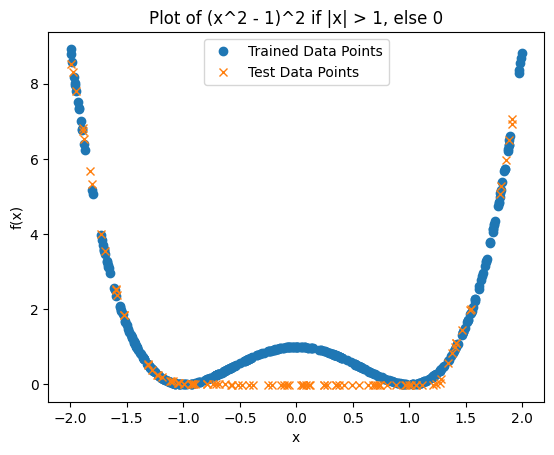

In [16]:
# plot of training data

# Plot the graph

plt.plot(X_train, Y_train, 'o', label='Trained Data Points')
plt.plot(X_test, predictions, 'x', label='Test Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of (x^2 - 1)^2 if |x| > 1, else 0')
plt.legend()
plt.show()